In [1]:
# Cell 1: Imports and Setup for backtest.ipynb

import sys
from pathlib import Path
# import os # No longer strictly needed here

# Add the 'notebooks' directory to sys.path
notebooks_dir = Path.cwd().parent 
if str(notebooks_dir) not in sys.path:
    sys.path.insert(0, str(notebooks_dir))

import pandas as pd
# import numpy as np # Not directly used in this cell
import logging
import datetime as dt # For Cell 4
import matplotlib.pyplot as plt # For Cell 4

from backtest.backtest_engine import run_backtest 
import backtest.backtest_utils as utils
import backtest.backtest_config as config # To access config variables

# --- Logging Setup for the Notebook ---
notebook_logger = logging.getLogger("backtest_notebook_per_minute") # MODIFIED
if not notebook_logger.handlers:
    notebook_logger.setLevel(logging.INFO)
    formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(name)s - %(message)s')
    ch = logging.StreamHandler()
    ch.setFormatter(formatter)
    notebook_logger.addHandler(ch)
else:
    notebook_logger.setLevel(logging.INFO)

# notebook_logger.info("Backtesting Notebook Setup Complete (for Per-Minute Model).")
# notebook_logger.info(f"Backtest on markets resolving: {config.BACKTEST_START_DATE_STR} to {config.BACKTEST_END_DATE_STR}")
# # notebook_logger.info(f"Decision Time: EACH MINUTE (driven by feature data rows)") # Old DECISION_TIME... not used
# notebook_logger.info(f"Model to be used from: {config.MODEL_DIR}") # This now points to .../logreg_per_minute

2025-05-22 19:14:18,805 - INFO - backtest_config - Eligible markets for backtest: Resolving from 2025-05-09 to 2025-05-15
2025-05-22 19:14:18,805 - INFO - backtest_config - Decision-making simulation: For decisions occurring from 2025-05-09 to 2025-05-15
2025-05-22 19:14:18,805 - INFO - backtest_config - Trading Thresholds: P(Yes) > 0.6 for BUY_YES; P(No) > 0.6 for BUY_NO
2025-05-22 19:14:18,806 - INFO - backtest_config - Feature files will be searched using pattern: /Users/omarabul-hassan/Desktop/projects/kalshi/notebooks/features/kalshi_per_minute_decision_features_*.csv
2025-05-22 19:14:18,806 - INFO - backtest_config - ONE_BET_PER_KALSHI_MARKET set to: False


In [2]:
# Cell 2: Load Model and Data

try:
    notebook_logger.info("Loading PER-MINUTE model, scaler, and feature names...")
    model, scaler, model_feature_names = utils.load_model_and_dependencies() # Uses updated paths from config
    notebook_logger.info("Model components loaded successfully.")

    notebook_logger.info("Loading PER-MINUTE features data...")
    all_features_df = utils.load_features_for_backtest() # Uses updated pattern from config
    notebook_logger.info(f"Per-minute features data loaded successfully with {len(all_features_df)} decision points.")
    
    if all_features_df.empty:
        notebook_logger.critical("Features DataFrame is empty. Aborting backtest.")
        raise SystemExit("Features DataFrame empty.")

except FileNotFoundError:
    notebook_logger.critical("Essential file not found (model, scaler, features, or data). Aborting backtest.")
    # raise
except Exception as e:
    notebook_logger.critical(f"An unexpected error occurred during loading: {e}", exc_info=True)
    # raise

2025-05-22 19:14:18,884 - INFO - backtest_notebook_per_minute - Loading PER-MINUTE model, scaler, and feature names...
2025-05-22 19:14:18,884 - INFO - backtest_notebook_per_minute - Loading PER-MINUTE model, scaler, and feature names...
2025-05-22 19:14:19,588 - INFO - root - Successfully loaded model from /Users/omarabul-hassan/Desktop/projects/kalshi/notebooks/trained_models/logreg_per_minute/logreg_per_minute_model.joblib, scaler, and 21 feature names.
2025-05-22 19:14:19,589 - INFO - backtest_notebook_per_minute - Model components loaded successfully.
2025-05-22 19:14:19,589 - INFO - backtest_notebook_per_minute - Model components loaded successfully.
2025-05-22 19:14:19,590 - INFO - backtest_notebook_per_minute - Loading PER-MINUTE features data...
2025-05-22 19:14:19,590 - INFO - backtest_notebook_per_minute - Loading PER-MINUTE features data...
2025-05-22 19:14:19,590 - INFO - root - Loading PER-MINUTE features for backtest from: /Users/omarabul-hassan/Desktop/projects/kalshi/n

In [3]:
# Cell 3: Run the Backtest

if 'model' in locals() and 'all_features_df' in locals() and not all_features_df.empty:
    notebook_logger.info("Proceeding to run the backtest engine with per-minute decision model...")
    try:
        total_pnl_cents, total_trades = run_backtest(all_features_df, model, scaler, model_feature_names)
        
        notebook_logger.info("--- Main Backtest Execution Finished (Per-Minute Model) ---")
        notebook_logger.info(f"Overall P&L from backtest engine: {total_pnl_cents / 100.0 :.2f} USD")
        notebook_logger.info(f"Total trades considered/made by engine: {total_trades}") # "Made" is more accurate if action != HOLD
        notebook_logger.info(f"Daily trade logs are in: {config.LOG_DIR}")

    except Exception as e:
        notebook_logger.error(f"An error occurred during run_backtest: {e}", exc_info=True)
else:
    notebook_logger.error("Model or features data not loaded. Cannot run backtest.")

2025-05-22 19:14:22,265 - INFO - backtest_notebook_per_minute - Proceeding to run the backtest engine with per-minute decision model...
2025-05-22 19:14:22,265 - INFO - backtest_notebook_per_minute - Proceeding to run the backtest engine with per-minute decision model...
2025-05-22 19:14:22,266 - INFO - backtest_engine_logger - Starting backtest engine for PER-MINUTE decision model...
2025-05-22 19:14:22,295 - INFO - backtest_engine_logger - Found 323066 decision points for markets resolving in the period.
2025-05-22 19:14:22,329 - INFO - backtest_engine_logger - Processing 233096 decision points that occur between 2025-05-09 and 2025-05-15.
2025-05-22 19:16:02,530 - INFO - backtest_engine_logger - Backtest engine (per-minute model) finished processing.
2025-05-22 19:16:02,531 - INFO - backtest_engine_logger - --- Backtest Summary ---
2025-05-22 19:16:02,531 - INFO - backtest_engine_logger - Total P&L: 5989.55 USD
2025-05-22 19:16:02,531 - INFO - backtest_engine_logger - YES Bets: 9717

2025-05-22 19:16:52,364 - INFO - backtest_notebook_per_minute - Found 7 trade log files:
2025-05-22 19:16:52,364 - INFO - backtest_notebook_per_minute - Found 7 trade log files:
2025-05-22 19:16:52,366 - INFO - backtest_notebook_per_minute -  - 2025-05-09_trades.csv
2025-05-22 19:16:52,366 - INFO - backtest_notebook_per_minute -  - 2025-05-09_trades.csv
2025-05-22 19:16:52,367 - INFO - backtest_notebook_per_minute -  - 2025-05-10_trades.csv
2025-05-22 19:16:52,367 - INFO - backtest_notebook_per_minute -  - 2025-05-10_trades.csv
2025-05-22 19:16:52,367 - INFO - backtest_notebook_per_minute -  - 2025-05-11_trades.csv
2025-05-22 19:16:52,367 - INFO - backtest_notebook_per_minute -  - 2025-05-11_trades.csv
2025-05-22 19:16:52,368 - INFO - backtest_notebook_per_minute -  - 2025-05-12_trades.csv
2025-05-22 19:16:52,368 - INFO - backtest_notebook_per_minute -  - 2025-05-12_trades.csv
2025-05-22 19:16:52,368 - INFO - backtest_notebook_per_minute -  - 2025-05-13_trades.csv
2025-05-22 19:16:52,3

,trade_execution_time_utc,market_ticker,strike_price,resolution_time_ts,decision_timestamp_s,time_to_resolution_minutes,action,predicted_prob_yes,bet_cost_cents,contracts_traded,kalshi_outcome_target,pnl_cents,trade_date_file
0,2025-05-09T00:00:00+00:00,KXBTCD-25MAY0917-T100999.99,100999.99,1746824400,1746748800,1260.0,BUY_YES,0.9476,94,1,1,6,2025-05-09
1,2025-05-09T00:00:00+00:00,KXBTCD-25MAY0917-T105499.99,105499.99,1746824400,1746748800,1260.0,BUY_NO,0.3094,69,1,0,31,2025-05-09
2,2025-05-09T00:00:00+00:00,KXBTCD-25MAY0917-T102999.99,102999.99,1746824400,1746748800,1260.0,BUY_YES,0.7268,72,1,1,28,2025-05-09
3,2025-05-09T00:00:00+00:00,KXBTCD-25MAY0917-T104999.99,104999.99,1746824400,1746748800,1260.0,BUY_NO,0.3669,63,1,0,37,2025-05-09
4,2025-05-09T00:00:00+00:00,KXBTCD-25MAY0917-T102499.99,102499.99,1746824400,1746748800,1260.0,BUY_YES,0.8180,81,1,1,19,2025-05-09


2025-05-22 19:16:52,529 - INFO - backtest_notebook_per_minute - Total P&L calculated from concatenated log files: 5989.55 USD
2025-05-22 19:16:52,529 - INFO - backtest_notebook_per_minute - Total P&L calculated from concatenated log files: 5989.55 USD


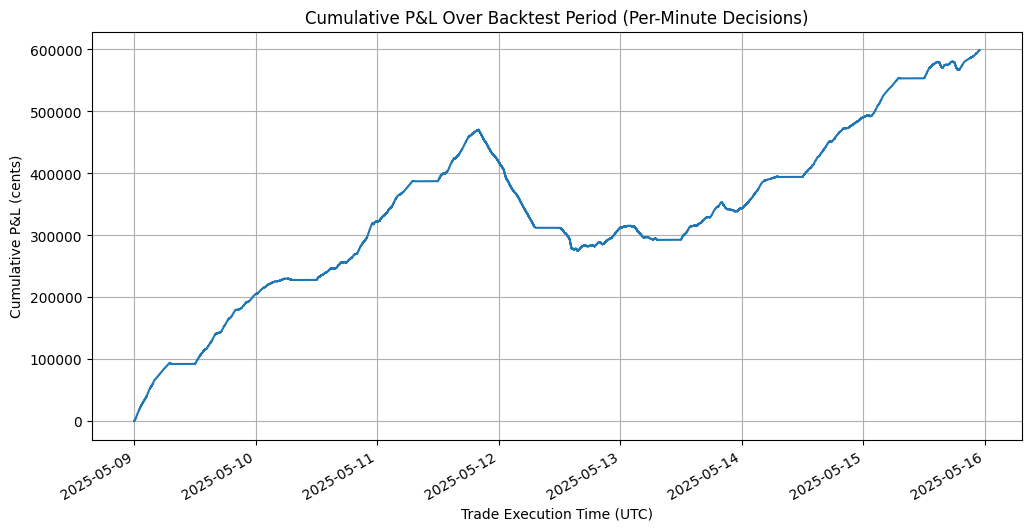

In [5]:
# Cell 4: (Optional) Basic Analysis of Trade Logs

# This cell can be expanded to load the daily CSV logs and perform more detailed analysis,
# create equity curves, calculate Sharpe ratio, etc.
# Ensure matplotlib is imported if not already done in Cell 1
import matplotlib.pyplot as plt
import pandas as pd # ensure imported if not already
from pathlib import Path # ensure imported for config.LOG_DIR

if config.LOG_DIR.exists():
    log_files = list(config.LOG_DIR.glob("*_trades.csv"))
    if log_files:
        notebook_logger.info(f"Found {len(log_files)} trade log files:")
        for lf in sorted(log_files): notebook_logger.info(f" - {lf.name}")
        
        all_daily_logs_df = pd.DataFrame()
        for lf in sorted(log_files):
            try:
                daily_df = pd.read_csv(lf)
                if not daily_df.empty:
                    daily_df['trade_date_file'] = lf.stem.split('_trades')[0] # Date from filename
                    all_daily_logs_df = pd.concat([all_daily_logs_df, daily_df], ignore_index=True)
            except pd.errors.EmptyDataError: notebook_logger.warning(f"Log file {lf.name} is empty.")
            except Exception as e: notebook_logger.error(f"Error reading log file {lf.name}: {e}")
        
        if not all_daily_logs_df.empty:
            notebook_logger.info(f"\nLoaded a total of {len(all_daily_logs_df)} trades from daily logs.")
            if not all_daily_logs_df.empty: display(all_daily_logs_df.head()) # Check before display
            
            pnl_from_logs = all_daily_logs_df['pnl_cents'].sum()
            notebook_logger.info(f"Total P&L calculated from concatenated log files: {pnl_from_logs / 100.0:.2f} USD")

            if 'trade_execution_time_utc' in all_daily_logs_df.columns and not all_daily_logs_df['trade_execution_time_utc'].isnull().all():
                try:
                    all_daily_logs_df['trade_datetime_utc'] = pd.to_datetime(all_daily_logs_df['trade_execution_time_utc'])
                    all_daily_logs_df.sort_values(by='trade_datetime_utc', inplace=True) # Sort by actual trade time
                    all_daily_logs_df['cumulative_pnl_cents'] = all_daily_logs_df['pnl_cents'].cumsum()
                    
                    plt.figure(figsize=(12,6))
                    all_daily_logs_df.set_index('trade_datetime_utc')['cumulative_pnl_cents'].plot()
                    plt.title('Cumulative P&L Over Backtest Period (Per-Minute Decisions)')
                    plt.xlabel('Trade Execution Time (UTC)')
                    plt.ylabel('Cumulative P&L (cents)')
                    plt.grid(True)
                    plt.show()
                except Exception as e:
                    notebook_logger.error(f"Error plotting P&L curve: {e}")
            else:
                notebook_logger.warning("Column 'trade_execution_time_utc' not found or all null in logs, cannot plot P&L curve by time.")
        else:
            notebook_logger.info("No trade data loaded from log files for analysis.")
    else:
        notebook_logger.info("No trade log files found in the log directory.")
else:
    notebook_logger.warning(f"Log directory {config.LOG_DIR} does not exist.")